 This notebook demonstrates all of the  photometry analysis used for the paper: "Fill in Title Later" by Rebecca Suthard and Ryan Senne et al. from the Ramirez Group.

In [1]:
import sys
sys.path.append(r"C:\Users\ryansenne\PycharmProjects\RamiPho")

# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from pathlib import Path
from sklearn.linear_model import RidgeCV
import photonsoup as fp

In [2]:
# path = Path("/home/ryansenne/Data/RLS_Team_Data/Dual_Color/")
path = Path(r"C:\Users\ryansenne\Documents\RLS_Team_Data\vCA1_Dual_Engram")

npm_path = path #/ "NPM_Files"
dlc_path = path #/ "DLC_Files"
any_path = path #/ "Anymaze_Files"

##### Create a set of fp curves for FC

In [3]:
shock_FC_2 = fp.FiberPhotometryCurve(npm_file=npm_path / "Test_Pho_dual_opto_chr2_shock_FC_m2.csv",
                                     dlc_file=dlc_path / "Test_Video_dual_opto_chr2_shock_FC_m2-004DLC_resnet50_engram_round2_front_fcApr21shuffle1_400000.csv",
                                     anymaze_file= any_path / "shock_2_old_dual_engram_FC_freeze.csv",
                                     offset=1048.644864, regress=True, ID="shock_FC_2", task="FC", treatment="shock")

shock_FC_6 = fp.FiberPhotometryCurve(npm_file=npm_path / "Shock_m6_fix_FC.csv",
                                     dlc_file=dlc_path / "Test_Video_dual_opto_chr2_shock_FC_m6-003DLC_resnet50_engram_round2_front_fcApr21shuffle1_400000.csv",
                                     anymaze_file= any_path / "shock_6_old_dual_engram_FC_freeze.csv",
                                     offset=3367.9992, regress=True, ID="shock_FC_6", task="FC", treatment="shock")

shock_FC_8 = fp.FiberPhotometryCurve(npm_file=npm_path / "Shock_m8_fix_FC.csv",
                                     dlc_file=dlc_path / "Test_Video_dual_opto_chr2_shock_FC_m8-010DLC_resnet50_engram_round2_front_fcApr21shuffle1_400000.csv",
                                     anymaze_file= any_path / "shock_8_old_dual_engram_FC_freeze.csv",
                                     offset=4463.946304, regress=True, ID="shock_FC_8", task="FC", treatment="shock")

shock_FC_9 = fp.FiberPhotometryCurve(npm_file=npm_path / "Test_Pho_dual_opto_chr2_shock_FC_m9.csv",
                                     dlc_file=dlc_path / "Test_Video_dual_opto_chr2_shock_FC_m9-008DLC_resnet50_engram_round2_front_fcApr21shuffle1_400000.csv",
                                     anymaze_file= any_path / "shock_9_old_dual_engram_FC_freeze.csv",
                                     offset=4985.380768, regress=True, ID="shock_FC_9", task="FC", treatment="shock")

shock_new_m1 = fp.FiberPhotometryCurve(npm_file=npm_path / "Test_Pho_m1_FC_113022.csv",
                                       dlc_file=dlc_path / "Test_Video_m1_FC_113022-001DLC_resnet50_engram_round2_front_fcApr21shuffle1_400000.csv",
                                       anymaze_file=any_path / "M1_new_shock_FC_Freeze.csv",
                                       offset=1907.98544, regress=True, ID="shock_new_m1", task="FC", treatment="shock")

shock_new_m2 = fp.FiberPhotometryCurve(npm_file=npm_path / "Test_Pho_m2_FC_113022.csv",
                                       dlc_file=dlc_path / "Test_Video_m2_FC_113022DLC_resnet50_engram_round2_front_fcApr21shuffle1_400000.csv",
                                       anymaze_file=path / "M2_new_shock_FC_Freeze.csv",
                                       offset=2886.21888, regress=True, ID="shock_new_m2", task="FC", treatment="shock")

shock_new_m7 = fp.FiberPhotometryCurve(npm_file=npm_path / "Test_Pho_m7_FC_113022.csv",
                                       dlc_file=dlc_path / "Test_Video_m7_FC_113022-003DLC_resnet50_engram_round2_front_fcApr21shuffle1_400000.csv",
                                       anymaze_file=any_path / "M7_new_shock_FC_Freeze.csv",
                                       offset=6106.110272, regress=True, ID="shock_new_m7", task="FC", treatment="shock")

shock_new_m8 = fp.FiberPhotometryCurve(npm_file=npm_path / "Test_Pho_m8_FC_113022.csv",
                                       dlc_file=dlc_path / "Test_Video_m8_FC_113022-002DLC_resnet50_engram_round2_front_fcApr21shuffle1_400000.csv",
                                       anymaze_file=any_path / "M8_new_shock_FC_Freeze.csv",
                                       offset=6922.345984, regress=True, ID="shock_new_m8", task="FC", treatment="shock")

shock_new_m9 = fp.FiberPhotometryCurve(npm_file=npm_path / "Test_Pho_m9_FC_113022.csv",
                                       dlc_file=dlc_path / "Test_Video_m9_FC_113022-005DLC_resnet50_engram_round2_front_fcApr21shuffle1_400000.csv",
                                       anymaze_file= any_path / "M9_new_shock_FC_Freeze.csv",
                                       offset=7827.630528, regress=True, ID="shock_new_m9", task="FC", treatment="shock")

shock_new_m10 = fp.FiberPhotometryCurve(npm_file=npm_path / "Test_Pho_m10_FC_113022.csv",
                                        dlc_file=dlc_path / "Test_Video_m10_FC_113022-001DLC_resnet50_engram_round2_front_fcApr21shuffle1_400000.csv", 
                                        anymaze_file= any_path / "M10_new_shock_FC_Freeze.csv",
                                        offset=8664.011616, regress=True, ID="shock_new_m10", task="FC", treatment="shock")

neutral_FC_2 = fp.FiberPhotometryCurve(npm_file=npm_path / "Test_Pho_dual_opto_neutral_M2_Tag.csv",
                                       dlc_file=dlc_path / "Test_Video_dual_opto_neutral_M2_Tag-006DLC_resnet50_engram_round2_front_fcApr21shuffle1_400000.csv",
                                       anymaze_file= any_path / "neutral_2_fc_freeze.csv",
                                       offset=1600.014304,regress=True, ID="neutral_FC_2", task="FC", treatment="neutral")

neutral_FC_3 = fp.FiberPhotometryCurve(npm_file=npm_path / "Test_Pho_dual_opto_neutral_M3_Tag.csv",
                                       dlc_file=dlc_path / "Test_Video_dual_opto_neutral_M3_Tag-004DLC_resnet50_engram_round2_front_fcApr21shuffle1_400000.csv",
                                       anymaze_file= any_path / "neutral_3_fc_freeze.csv",
                                       offset=2242.315776,regress=True, ID="neutral_FC_3", task="FC", treatment="neutral")

neutral_FC_5 = fp.FiberPhotometryCurve(npm_file=npm_path / "Test_Pho_dual_opto_neutral_M5_Tag.csv",
                                       dlc_file=dlc_path / "Test_Video_dual_opto_neutral_M5_Tag-001DLC_resnet50_engram_round2_front_fcApr21shuffle1_400000.csv",
                                       anymaze_file= any_path / "neutral_5_fc_freeze.csv",
                                       offset=3544.831744,regress=True, ID="neutral_FC_5", task="FC", treatment="neutral")

neutral_FC_6 = fp.FiberPhotometryCurve(npm_file=npm_path / "Test_Pho_dual_opto_neutral_M6_Tag.csv",
                                       dlc_file=dlc_path / "Test_Video_dual_opto_neutral_M6_Tag-002DLC_resnet50_engram_round2_front_fcApr21shuffle1_400000.csv",
                                       anymaze_file= any_path / "neutral_6_fc_freeze.csv",
                                       offset=4247.564736,regress=True, ID="neutral_FC_6", task="FC", treatment="neutral")

neutral_FC_9 = fp.FiberPhotometryCurve(npm_file=npm_path / "Test_Pho_dual_opto_neutral_M9_Tag.csv",
                                       dlc_file=dlc_path / "Test_Video_dual_opto_neutral_M9_TagDLC_resnet50_engram_round2_front_fcApr21shuffle1_400000.csv",
                                       anymaze_file= any_path / "neutral_9_fc_freeze.csv",
                                       offset=6476.010048,regress=True, ID="neutral_FC_9", task="FC", treatment="neutral")

neutral_m10_FC = fp.FiberPhotometryCurve(npm_file=npm_path / "Test_Pho_dual_opto_neutral_m10_FC.csv",
                                         dlc_file=dlc_path / "Test_Video_dual_opto_neutral_m10_FC-005DLC_resnet50_engram_round2_front_fcApr21shuffle1_400000.csv",
                                         anymaze_file= any_path / "Neutral_M10_FC_freezing.csv",
                                         offset=8167.115392, regress=True, ID="neutral_m10_FC", task="FC", treatment="neutral")

neutral_m12_FC = fp.FiberPhotometryCurve(npm_file=npm_path / "Test_Pho_dual_opto_neutral_m12_FC.csv",
                                         dlc_file=dlc_path / "Test_Video_dual_opto_neutral_m12_FC-004DLC_resnet50_engram_round2_front_fcApr21shuffle1_400000.csv",
                                         anymaze_file= any_path / "Neutral_M12_FC_freezing.csv",
                                         offset=9365.22896, regress=True, ID="neutral_m12_FC", task="FC", treatment="neutral")

eYFP_FC_1 = fp.FiberPhotometryCurve(npm_file=npm_path / "eYFP_M1_fix_FC.csv",
                                    dlc_file=dlc_path / "Test_Video_dual_opto_eYFP_shock_M1_FC-003DLC_resnet50_engram_round2_front_fcApr21shuffle1_400000.csv",
                                    anymaze_file= any_path / "eYFP_1_fc_freeze.csv",
                                    offset=2069.237856,regress=True, ID="eYFP_FC_1", task="FC", treatment="eYFP")

eYFP_FC_2 = fp.FiberPhotometryCurve(npm_file=npm_path / "eYFP_M2_fix_FC.csv",
                                    dlc_file=dlc_path / "Test_Video_dual_opto_eYFP_shock_M2_FC-004DLC_resnet50_engram_round2_front_fcApr21shuffle1_400000.csv",
                                    anymaze_file= any_path / "eYFP_2_fc_freeze.csv",
                                    offset=1219.886656,regress=True, ID="eYFP_FC_2", task="FC", treatment="eYFP")

eYFP_FC_3 = fp.FiberPhotometryCurve(npm_file=npm_path / "eYFP_M3_fix_FC.csv",
                                    dlc_file=dlc_path / "Test_Video_dual_opto_eYFP_shock_M3_FC-002DLC_resnet50_engram_round2_front_fcApr21shuffle1_400000.csv",
                                    anymaze_file= any_path / "eYFP_3_fc_freeze.csv",
                                    offset=2617.520768,regress=True, ID="eYFP_FC_3", task="FC", treatment="eYFP")

eYFP_FC_4 = fp.FiberPhotometryCurve(npm_file=npm_path / "eYFP_M4_fix_FC.csv",
                                    dlc_file=dlc_path / "Test_Video_dual_opto_eYFP_shock_M4_FC-001DLC_resnet50_engram_round2_front_fcApr21shuffle1_400000.csv",
                                    anymaze_file= any_path / "eYFP_4_fc_freeze.csv", 
                                    offset=3191.672608, regress=True, ID="eYFP_FC_4", task="FC", treatment="eYFP")

eYFP_m5_FC = fp.FiberPhotometryCurve(npm_file=npm_path / "Test_Pho_dual_opto_shock_eYFP_m5_FC.csv",
                                     dlc_file=dlc_path / "Test_Video_dual_opto_shock_eYFP_m5_FC-007DLC_resnet50_engram_round2_front_fcApr21shuffle1_400000.csv",
                                     anymaze_file= any_path / "eYFP_M5_FC_freezing.csv",
                                     offset=2494.345376, regress=True, ID="eYFP_m5_FC", task="FC", treatment="eYFP")

eYFP_m6_FC = fp.FiberPhotometryCurve(npm_file=npm_path / "Test_Pho_dual_opto_shock_eYFP_m6_FC.csv",
                                     dlc_file=dlc_path / "Test_Video_dual_opto_shock_eYFP_m6_FC-003DLC_resnet50_engram_round2_front_fcApr21shuffle1_400000.csv",
                                     anymaze_file= any_path / "eYFP_M6_FC_freezing.csv",
                                     offset=3180.09312, regress=True, ID="eYFP_m6_FC", task="FC", treatment="eYFP")

eYFP_m7_FC = fp.FiberPhotometryCurve(npm_file=npm_path / "Test_Pho_dual_opto_shock_eYFP_m7_FC.csv",
                                     dlc_file=dlc_path / "Test_Video_dual_opto_shock_eYFP_m7_FC-001DLC_resnet50_engram_round2_front_fcApr21shuffle1_400000.csv",
                                     anymaze_file= any_path / "eYFP_M7_FC_freezing.csv",
                                     offset=3941.079296, regress=True, ID="eYFP_m7_FC", task="FC", treatment="eYFP")

eYFP_m9_FC = fp.FiberPhotometryCurve(npm_file=npm_path / "Test_Pho_dual_opto_shock_eYFP_m9_FC.csv",
                                     dlc_file=dlc_path / "Test_Video_dual_opto_shock_eYFP_m9_FC-006DLC_resnet50_engram_round2_front_fcApr21shuffle1_400000.csv",
                                     anymaze_file= any_path / "eYFP_M9_FC_freezing.csv",
                                     offset=5445.365856, regress=True, ID="eYFP_m9_FC", task="FC", treatment="eYFP")

eYFP_mb_m1_FC = fp.FiberPhotometryCurve(npm_file=npm_path / "Test_Pho_vCA1_dual_spont_fc_M1.csv",
                                     dlc_file=dlc_path / "Test_Video_vCA1_dual_spont_FC_M1-002DLC_resnet50_engram_round2_front_fcApr21shuffle1_400000.csv",
                                     anymaze_file= any_path / "m1_FC.csv",
                                     offset=1274.41616, regress=True, ID="eYFP_mb_m1_FC", task="FC", treatment="eYFP")

eYFP_mb_m2_FC = fp.FiberPhotometryCurve(npm_file=npm_path / "Test_Pho_vCA1_dual_spont_fc_M2.csv",
                                     dlc_file=dlc_path / "Test_Video_vCA1_dual_spont_FC_M2-006DLC_resnet50_engram_round2_front_fcApr21shuffle1_400000.csv",
                                     anymaze_file= any_path / "m2_FC.csv",
                                     offset=1903.95312, regress=True, ID="eYFP_mb_m2_FC", task="FC", treatment="eYFP")

eYFP_mb_m3_FC = fp.FiberPhotometryCurve(npm_file=npm_path / "Test_Pho_vCA1_dual_spont_fc_M3.csv",
                                     dlc_file=dlc_path / "Test_Video_vCA1_dual_spont_FC_M3-003DLC_resnet50_engram_round2_front_fcApr21shuffle1_400000.csv",
                                     anymaze_file= any_path / "m3_FC.csv",
                                     offset=2672.332256, regress=True, ID="eYFP_mb_m3_FC", task="FC", treatment="eYFP")

eYFP_mb_m5_FC = fp.FiberPhotometryCurve(npm_file=npm_path / "Test_Pho_vCA1_dual_spont_fc_M5.csv",
                                     dlc_file=dlc_path / "Test_Video_vCA1_dual_spont_FC_M5-001DLC_resnet50_engram_round2_front_fcApr21shuffle1_400000.csv",
                                     anymaze_file= any_path / "m5_FC.csv",
                                     offset=3952.073312, regress=True, ID="eYFP_mb_m5_FC", task="FC", treatment="eYFP")

eYFP_mb_m6_FC = fp.FiberPhotometryCurve(npm_file=npm_path / "Test_Pho_vCA1_dual_spont_fc_M6.csv",
                                     dlc_file=dlc_path / "Test_Video_vCA1_dual_spont_FC_M6-005DLC_resnet50_engram_round2_front_fcApr21shuffle1_400000.csv",
                                     anymaze_file= any_path / "m6_FC.csv",
                                     offset=4487.877888, regress=True, ID="eYFP_mb_m6_FC", task="FC", treatment="eYFP")

eYFP_mb_m7_FC = fp.FiberPhotometryCurve(npm_file=npm_path / "Test_Pho_vCA1_dual_spont_fc_M7.csv",
                                     dlc_file=dlc_path / "Test_Video_vCA1_dual_spont_FC_M7-004DLC_resnet50_engram_round2_front_fcApr21shuffle1_400000.csv",
                                     anymaze_file= any_path / "m7_FC.csv",
                                     offset=5117.897056, regress=True, ID="eYFP_mb_m7_FC", task="FC", treatment="eYFP")

eYFP_mb_m8_FC = fp.FiberPhotometryCurve(npm_file=npm_path / "Test_Pho_vCA1_dual_spont_fc_M8.csv",
                                     dlc_file=dlc_path / "Test_Video_vCA1_dual_spont_FC_M8-008DLC_resnet50_engram_round2_front_fcApr21shuffle1_400000.csv",
                                     anymaze_file= any_path / "m8_FC.csv",
                                     offset=5879.834016, regress=True, ID="eYFP_mb_m8_FC", task="FC", treatment="eYFP")


In [4]:
fc_collection = fp.FiberPhotometryCollection()
fc_collection.add_curve(shock_FC_2, shock_FC_6, shock_FC_8, shock_FC_9, shock_new_m1, shock_new_m2, shock_new_m7, shock_new_m8, shock_new_m9, shock_new_m10, neutral_FC_2, neutral_FC_3, neutral_FC_5, neutral_FC_6, neutral_FC_9, neutral_m10_FC, neutral_m12_FC, eYFP_FC_1, eYFP_FC_2, eYFP_FC_3, eYFP_FC_4, eYFP_m5_FC, eYFP_m6_FC, eYFP_m7_FC, eYFP_m9_FC, eYFP_mb_m1_FC, eYFP_mb_m2_FC, eYFP_mb_m3_FC, eYFP_mb_m5_FC, eYFP_mb_m6_FC, eYFP_mb_m7_FC, eYFP_mb_m8_FC)

fc_collection.batch_data()
fc_collection.batch_behavior(end=360)

In [78]:
X_shock = fc_collection.design_matrix(task="FC", treatment="shock", region_g="Region1G", region_r="Region0R")
X_eyfp = fc_collection.design_matrix(task="FC", treatment="eYFP", region_g="Region1G", region_r="Region0R")
X_neutral = fc_collection.design_matrix(task="FC", treatment="neutral", region_g="Region1G", region_r="Region0R")

x_shock = X_shock.drop(["R", "G", "Freezing"], axis=1)
x_eyfp = X_eyfp.drop(["R", "G", "Freezing"], axis=1)
x_neutral = X_neutral.drop(["R", "G", "Freezing"], axis=1)

y_shock = X_shock["G"]
y_eyfp = X_eyfp["G"]
y_neutral = X_neutral["G"]

In [79]:
from sklearn.linear_model import RidgeCV

# Define a function to fit the model for each subject and return the coefficients and R-squared value
def fit_model_for_subject(x_group, y_group, subject_id):
    x_sub = x_group[x_group["Mouse_ID"] == subject_id].drop(["Mouse_ID"], axis=1).reset_index(drop=True)
    y_sub = y_group[x_group["Mouse_ID"] == subject_id].reset_index(drop=True)
    
    model = RidgeCV(alphas=np.linspace(0.01, 1, 1000))
    model.fit(x_sub, y_sub)
    
    sub_coef = pd.Series(np.append(model.intercept_, model.coef_), index=["intercept"] + list(x_sub.columns))
    
    return sub_coef, model.score(x_sub, y_sub)

# Initialize a DataFrame to hold all coefficients and a list for R-squared values
all_coefficients = pd.DataFrame()
all_r2_values = []

# Data structure to hold all the groups data and names
groups = {
    "ChR2": (x_shock, y_shock),
    "eYFP": (x_eyfp, y_eyfp),
    "Neutral": (x_neutral, y_neutral)
}

# Loop over each group
for group_name, (x_group, y_group) in groups.items():
    subjects = x_group.Mouse_ID.unique()
    
    for sub in subjects:
        sub_coef, r2_value = fit_model_for_subject(x_group, y_group, sub)
        
        # Add group and subject ID information
        sub_coef["group"] = group_name
        sub_coef["Mouse_ID"] = sub
        
        # Append the coefficients and R-squared values to their respective DataFrames
        all_coefficients = all_coefficients.append(sub_coef, ignore_index=True)
        all_r2_values.append((group_name, sub, r2_value))

# Convert R-squared values to a DataFrame
r2_df = pd.DataFrame(all_r2_values, columns=["Group", "Mouse_ID", "R_squared"])

# Find the best fitting subject (across all groups)
best_model_index = np.argmax(r2_df["R_squared"])
best_model_info = r2_df.iloc[best_model_index]

print(all_coefficients)
print(r2_df)
print("Best model is from subject:", best_model_info["Mouse_ID"], "in group:", best_model_info["Group"])


C:\Users\ryansenne\AppData\Local\Temp\ipykernel_8504\3357067599.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_coefficients = all_coefficients.append(sub_coef, ignore_index=True)
C:\Users\ryansenne\AppData\Local\Temp\ipykernel_8504\3357067599.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_coefficients = all_coefficients.append(sub_coef, ignore_index=True)
C:\Users\ryansenne\AppData\Local\Temp\ipykernel_8504\3357067599.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_coefficients = all_coefficients.append(sub_coef, ignore_index=True)
C:\Users\ryansenne\AppData\Local\Temp\ipykernel_8504\3357067599.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a futur

    intercept         X         Y  X_velocity  Y_velocity  X_acceleration  \
0    1.907643 -0.002225 -0.003958    0.010088    0.008355       -3.696833   
1   -1.384281 -0.001221  0.004446   -0.001448    0.034636       -4.266123   
2    3.183238 -0.001066 -0.008463   -0.015691    0.018387        0.621147   
3   -5.842933  0.001547  0.014285    0.001268    0.015029       -1.356700   
4   -0.421228  0.000076  0.000623   -0.001508    0.004544       -0.910767   
5    3.493321 -0.008223 -0.002734    0.000275    0.011439      -10.005774   
6   -1.639546  0.005904 -0.000621    0.002378    0.021774        6.380119   
7   -2.192551  0.007881  0.000143   -0.001206    0.010837        4.533690   
8   -0.366884 -0.004020  0.003959   -0.021983    0.004415       -3.208921   
9    2.550279  0.002531 -0.008578    0.001029    0.013307        0.362194   
10  -1.564780  0.002886  0.001687    0.005496   -0.004612        2.328886   
11   1.830680  0.001582 -0.007066   -0.000135   -0.002704        0.827489   

C:\Users\ryansenne\AppData\Local\Temp\ipykernel_8504\3357067599.py:38: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  all_coefficients = all_coefficients.append(sub_coef, ignore_index=True)


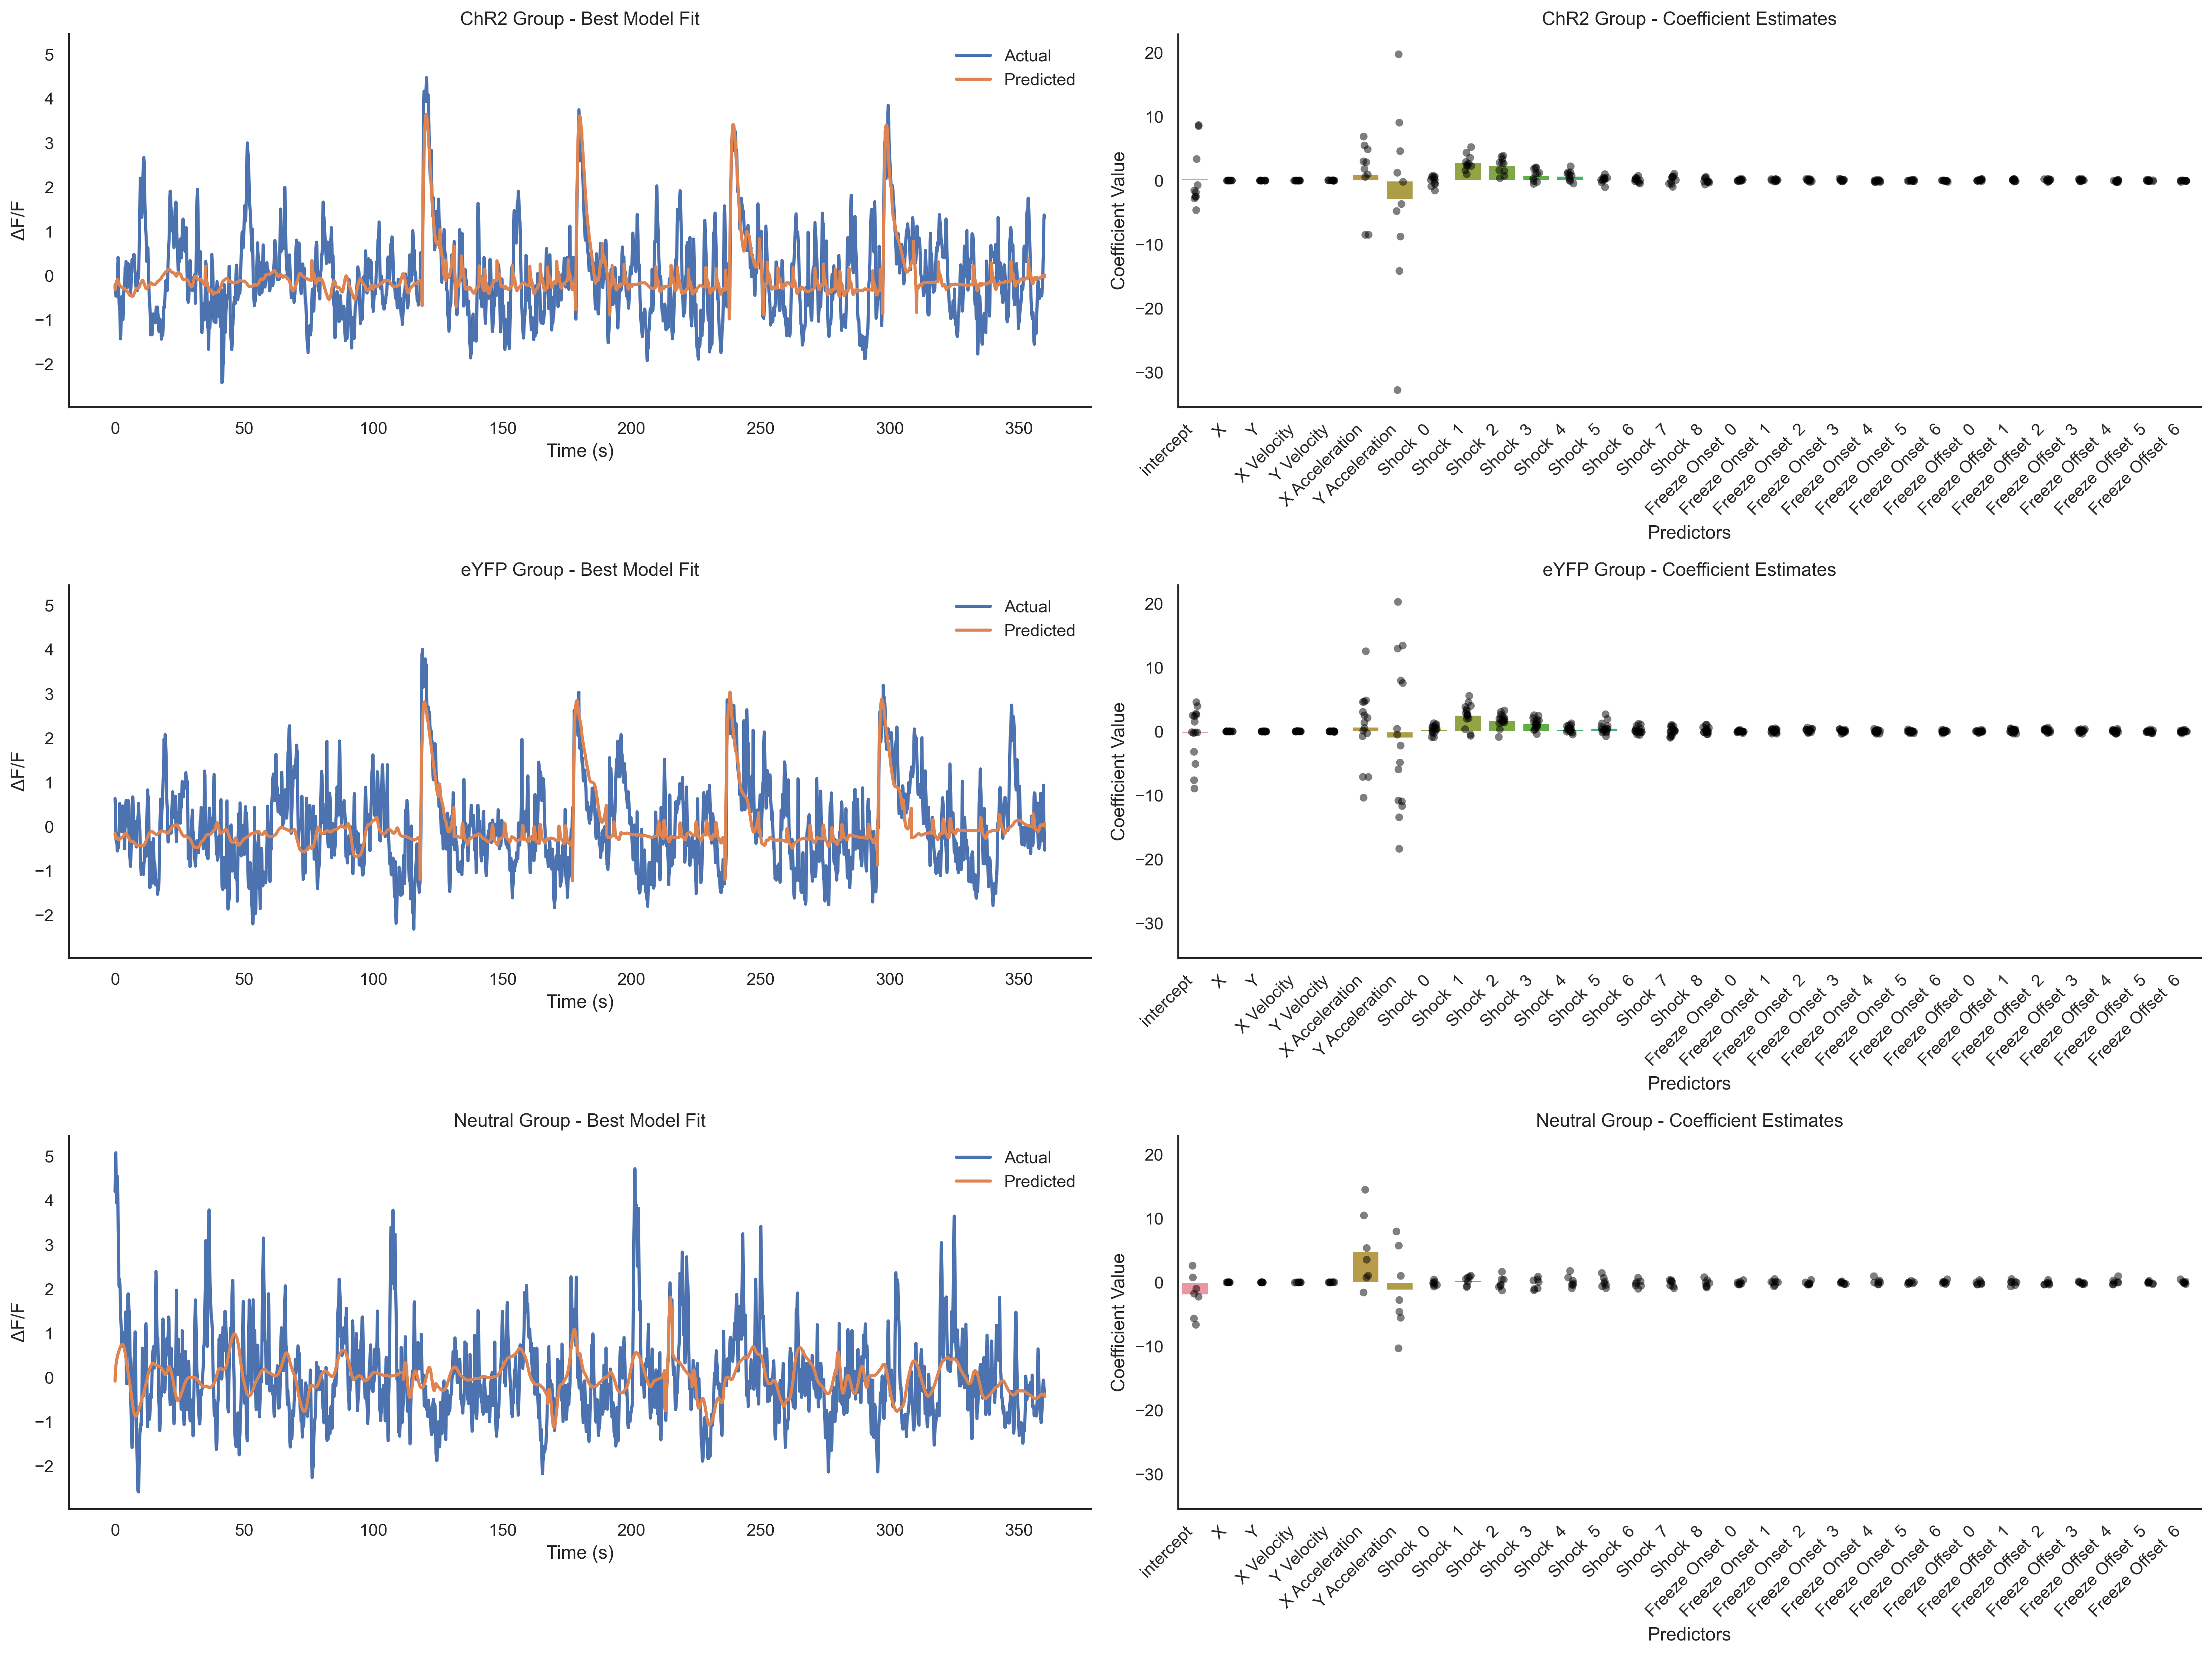

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the matplotlib figure with subplots
fig, axes = plt.subplots(3, 2, figsize=(20, 15), sharey="col")  # 3 groups, 2 plots per group
sns.set_theme(context="notebook", style="white")
sns.despine(left=False, bottom=False)
# label function
def label_function(val):
    val = val.replace("_", " ")
    val = val.replace("Spline", " ")
    val = val.replace("acceleration", "Acceleration")
    val = val.replace("velocity", "Velocity")
    return val

# Loop through each group to generate plots
for i, (group_name, (x_group, y_group)) in enumerate(groups.items()):
    # Filter the coefficients and R-squared values for the current group
    group_coefficients = all_coefficients[all_coefficients['group'] == group_name]
    group_r2 = r2_df[r2_df['Group'] == group_name]
    
    # Find the best model within this group
    best_model_sub = group_r2.loc[group_r2['R_squared'].idxmax(), 'Mouse_ID']
    
    # Extract the best model's data for the line plot
    x_best = x_group[x_group["Mouse_ID"] == best_model_sub].drop(["Mouse_ID"], axis=1).reset_index(drop=True)
    y_best = y_group[x_group["Mouse_ID"] == best_model_sub].reset_index(drop=True)
    
    # Fit the best model
    best_model = RidgeCV(alphas=np.linspace(0.01, 1, 1000))
    best_model.fit(x_best, y_best)
    
    # Generate time points for the line plot based on the length of y_best
    time = np.linspace(0, 360, len(y_best))
    
    # Plotting the best model's fit on the left
    line_ax = axes[i, 0]  # Line plot on the left
    line_ax.plot(time, y_best, label="Actual", linewidth=2)
    line_ax.plot(time, best_model.predict(x_best), label="Predicted", linewidth=2)
    line_ax.set_title(f'{group_name} Group - Best Model Fit')
    line_ax.set_ylabel('$\Delta$F/F')
    line_ax.set_xlabel('Time (s)')
    line_ax.legend()
    
    # Plotting the coefficients on the right
    bar_ax = axes[i, 1]  # Bar plot on the right
    sns.barplot(data=group_coefficients.drop(columns=['group', 'Mouse_ID']), ax=bar_ax, ci=None)
    sns.stripplot(data=group_coefficients.drop(columns=['group', 'Mouse_ID']), color='black', alpha=0.5, ax=bar_ax, jitter=True)
    bar_ax.set_xlabel('Predictors')
    bar_ax.set_ylabel('Coefficient Value')
    bar_ax.set_title(f'{group_name} Group - Coefficient Estimates')
    labels = [label_function(label.get_text()) for label in bar_ax.get_xticklabels()]
    bar_ax.set_xticklabels(labels, rotation=45, ha='right')

plt.tight_layout()
plt.show()
fig.savefig("FC_Regression_Red.png", dpi=900)


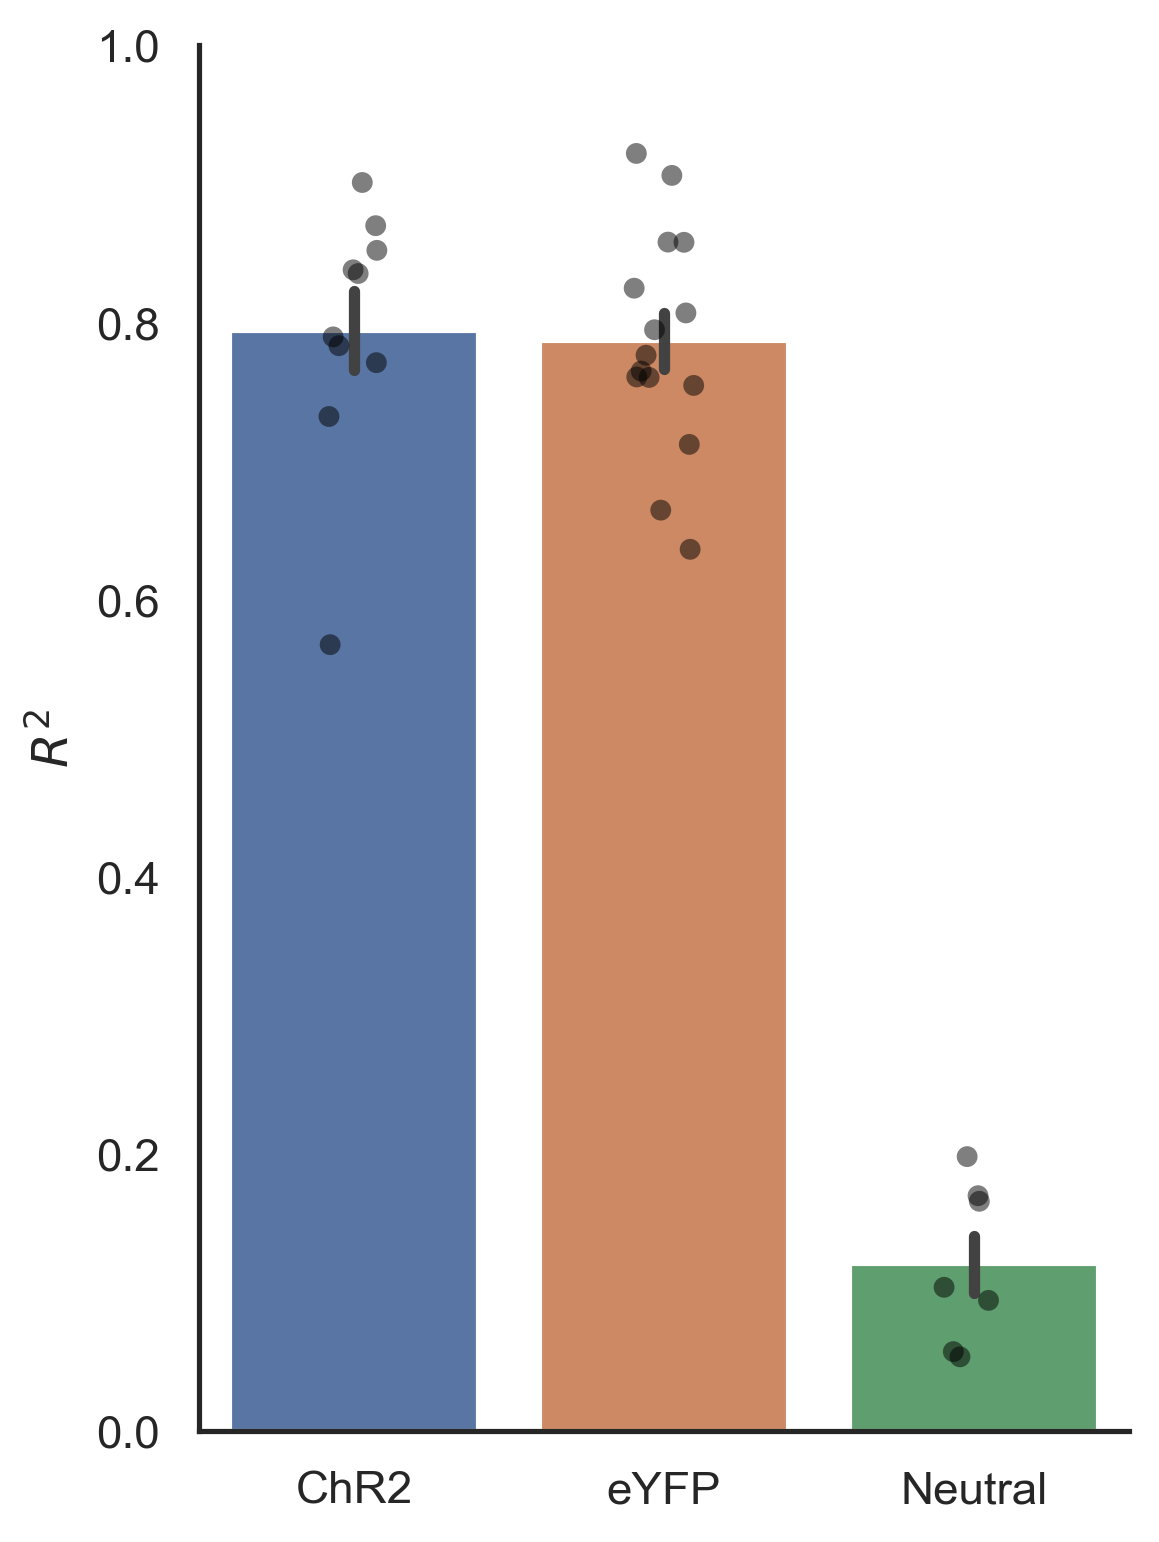

In [80]:
# plot r2 values across groups
fig, r2_ax = plt.subplots(figsize=(4, 6))
sns.despine(left=False, bottom=False)
sns.barplot(data=r2_df, x="Group", y="R_squared", ax=r2_ax, ci=68)
sns.stripplot(data=r2_df, x="Group", y="R_squared", color='black', alpha=0.5, ax=r2_ax, jitter=True)
r2_ax.set_ylim(0, 1)
r2_ax.set_ylabel("$R^2$")
r2_ax.set_xlabel("")

fig.savefig("FC_R2_Green.png", dpi=900)

c:\Users\ryansenne\anaconda3\envs\RamiPho\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


c:\Users\ryansenne\anaconda3\envs\RamiPho\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


c:\Users\ryansenne\anaconda3\envs\RamiPho\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


c:\Users\ryansenne\anaconda3\envs\RamiPho\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


c:\Users\ryansenne\anaconda3\envs\RamiPho\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


c:\Users\ryansenne\anaconda3\envs\RamiPho\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


c:\Users\ryansenne\anaconda3\envs\RamiPho\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


c:\Users\ryansenne\anaconda3\envs\RamiPho\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


c:\Users\ryansenne\anaconda3\envs\RamiPho\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


c:\Users\ryansenne\anaconda3\envs\RamiPho\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


c:\Users\ryansenne\anaconda3\envs\RamiPho\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


c:\Users\ryansenne\anaconda3\envs\RamiPho\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


c:\Users\ryansenne\anaconda3\envs\RamiPho\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


c:\Users\ryansenne\anaconda3\envs\RamiPho\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


c:\Users\ryansenne\anaconda3\envs\RamiPho\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


c:\Users\ryansenne\anaconda3\envs\RamiPho\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


c:\Users\ryansenne\anaconda3\envs\RamiPho\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


c:\Users\ryansenne\anaconda3\envs\RamiPho\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


c:\Users\ryansenne\anaconda3\envs\RamiPho\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


c:\Users\ryansenne\anaconda3\envs\RamiPho\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


c:\Users\ryansenne\anaconda3\envs\RamiPho\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


c:\Users\ryansenne\anaconda3\envs\RamiPho\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


c:\Users\ryansenne\anaconda3\envs\RamiPho\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


c:\Users\ryansenne\anaconda3\envs\RamiPho\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


c:\Users\ryansenne\anaconda3\envs\RamiPho\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


c:\Users\ryansenne\anaconda3\envs\RamiPho\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


c:\Users\ryansenne\anaconda3\envs\RamiPho\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


c:\Users\ryansenne\anaconda3\envs\RamiPho\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


c:\Users\ryansenne\anaconda3\envs\RamiPho\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


c:\Users\ryansenne\anaconda3\envs\RamiPho\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


c:\Users\ryansenne\anaconda3\envs\RamiPho\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


c:\Users\ryansenne\anaconda3\envs\RamiPho\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


c:\Users\ryansenne\anaconda3\envs\RamiPho\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


c:\Users\ryansenne\anaconda3\envs\RamiPho\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


c:\Users\ryansenne\anaconda3\envs\RamiPho\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


c:\Users\ryansenne\anaconda3\envs\RamiPho\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


c:\Users\ryansenne\anaconda3\envs\RamiPho\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


c:\Users\ryansenne\anaconda3\envs\RamiPho\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


c:\Users\ryansenne\anaconda3\envs\RamiPho\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


c:\Users\ryansenne\anaconda3\envs\RamiPho\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


c:\Users\ryansenne\anaconda3\envs\RamiPho\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


c:\Users\ryansenne\anaconda3\envs\RamiPho\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


c:\Users\ryansenne\anaconda3\envs\RamiPho\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


c:\Users\ryansenne\anaconda3\envs\RamiPho\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


c:\Users\ryansenne\anaconda3\envs\RamiPho\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


c:\Users\ryansenne\anaconda3\envs\RamiPho\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


c:\Users\ryansenne\anaconda3\envs\RamiPho\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


c:\Users\ryansenne\anaconda3\envs\RamiPho\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


c:\Users\ryansenne\anaconda3\envs\RamiPho\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


c:\Users\ryansenne\anaconda3\envs\RamiPho\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


c:\Users\ryansenne\anaconda3\envs\RamiPho\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


c:\Users\ryansenne\anaconda3\envs\RamiPho\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


c:\Users\ryansenne\anaconda3\envs\RamiPho\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


c:\Users\ryansenne\anaconda3\envs\RamiPho\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


c:\Users\ryansenne\anaconda3\envs\RamiPho\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


c:\Users\ryansenne\anaconda3\envs\RamiPho\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


c:\Users\ryansenne\anaconda3\envs\RamiPho\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


c:\Users\ryansenne\anaconda3\envs\RamiPho\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


c:\Users\ryansenne\anaconda3\envs\RamiPho\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


c:\Users\ryansenne\anaconda3\envs\RamiPho\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


c:\Users\ryansenne\anaconda3\envs\RamiPho\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


c:\Users\ryansenne\anaconda3\envs\RamiPho\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


c:\Users\ryansenne\anaconda3\envs\RamiPho\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


c:\Users\ryansenne\anaconda3\envs\RamiPho\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


c:\Users\ryansenne\anaconda3\envs\RamiPho\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


c:\Users\ryansenne\anaconda3\envs\RamiPho\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


c:\Users\ryansenne\anaconda3\envs\RamiPho\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


c:\Users\ryansenne\anaconda3\envs\RamiPho\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


c:\Users\ryansenne\anaconda3\envs\RamiPho\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


c:\Users\ryansenne\anaconda3\envs\RamiPho\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


c:\Users\ryansenne\anaconda3\envs\RamiPho\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


c:\Users\ryansenne\anaconda3\envs\RamiPho\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


c:\Users\ryansenne\anaconda3\envs\RamiPho\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


c:\Users\ryansenne\anaconda3\envs\RamiPho\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


c:\Users\ryansenne\anaconda3\envs\RamiPho\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


c:\Users\ryansenne\anaconda3\envs\RamiPho\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


c:\Users\ryansenne\anaconda3\envs\RamiPho\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


c:\Users\ryansenne\anaconda3\envs\RamiPho\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


c:\Users\ryansenne\anaconda3\envs\RamiPho\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


c:\Users\ryansenne\anaconda3\envs\RamiPho\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


c:\Users\ryansenne\anaconda3\envs\RamiPho\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


c:\Users\ryansenne\anaconda3\envs\RamiPho\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


c:\Users\ryansenne\anaconda3\envs\RamiPho\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


c:\Users\ryansenne\anaconda3\envs\RamiPho\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


c:\Users\ryansenne\anaconda3\envs\RamiPho\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


c:\Users\ryansenne\anaconda3\envs\RamiPho\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


c:\Users\ryansenne\anaconda3\envs\RamiPho\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


c:\Users\ryansenne\anaconda3\envs\RamiPho\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


c:\Users\ryansenne\anaconda3\envs\RamiPho\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


c:\Users\ryansenne\anaconda3\envs\RamiPho\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.
  warnings.warn(


c:\Users\ryansenne\anaconda3\envs\RamiPho\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=14.
  warnings.warn(


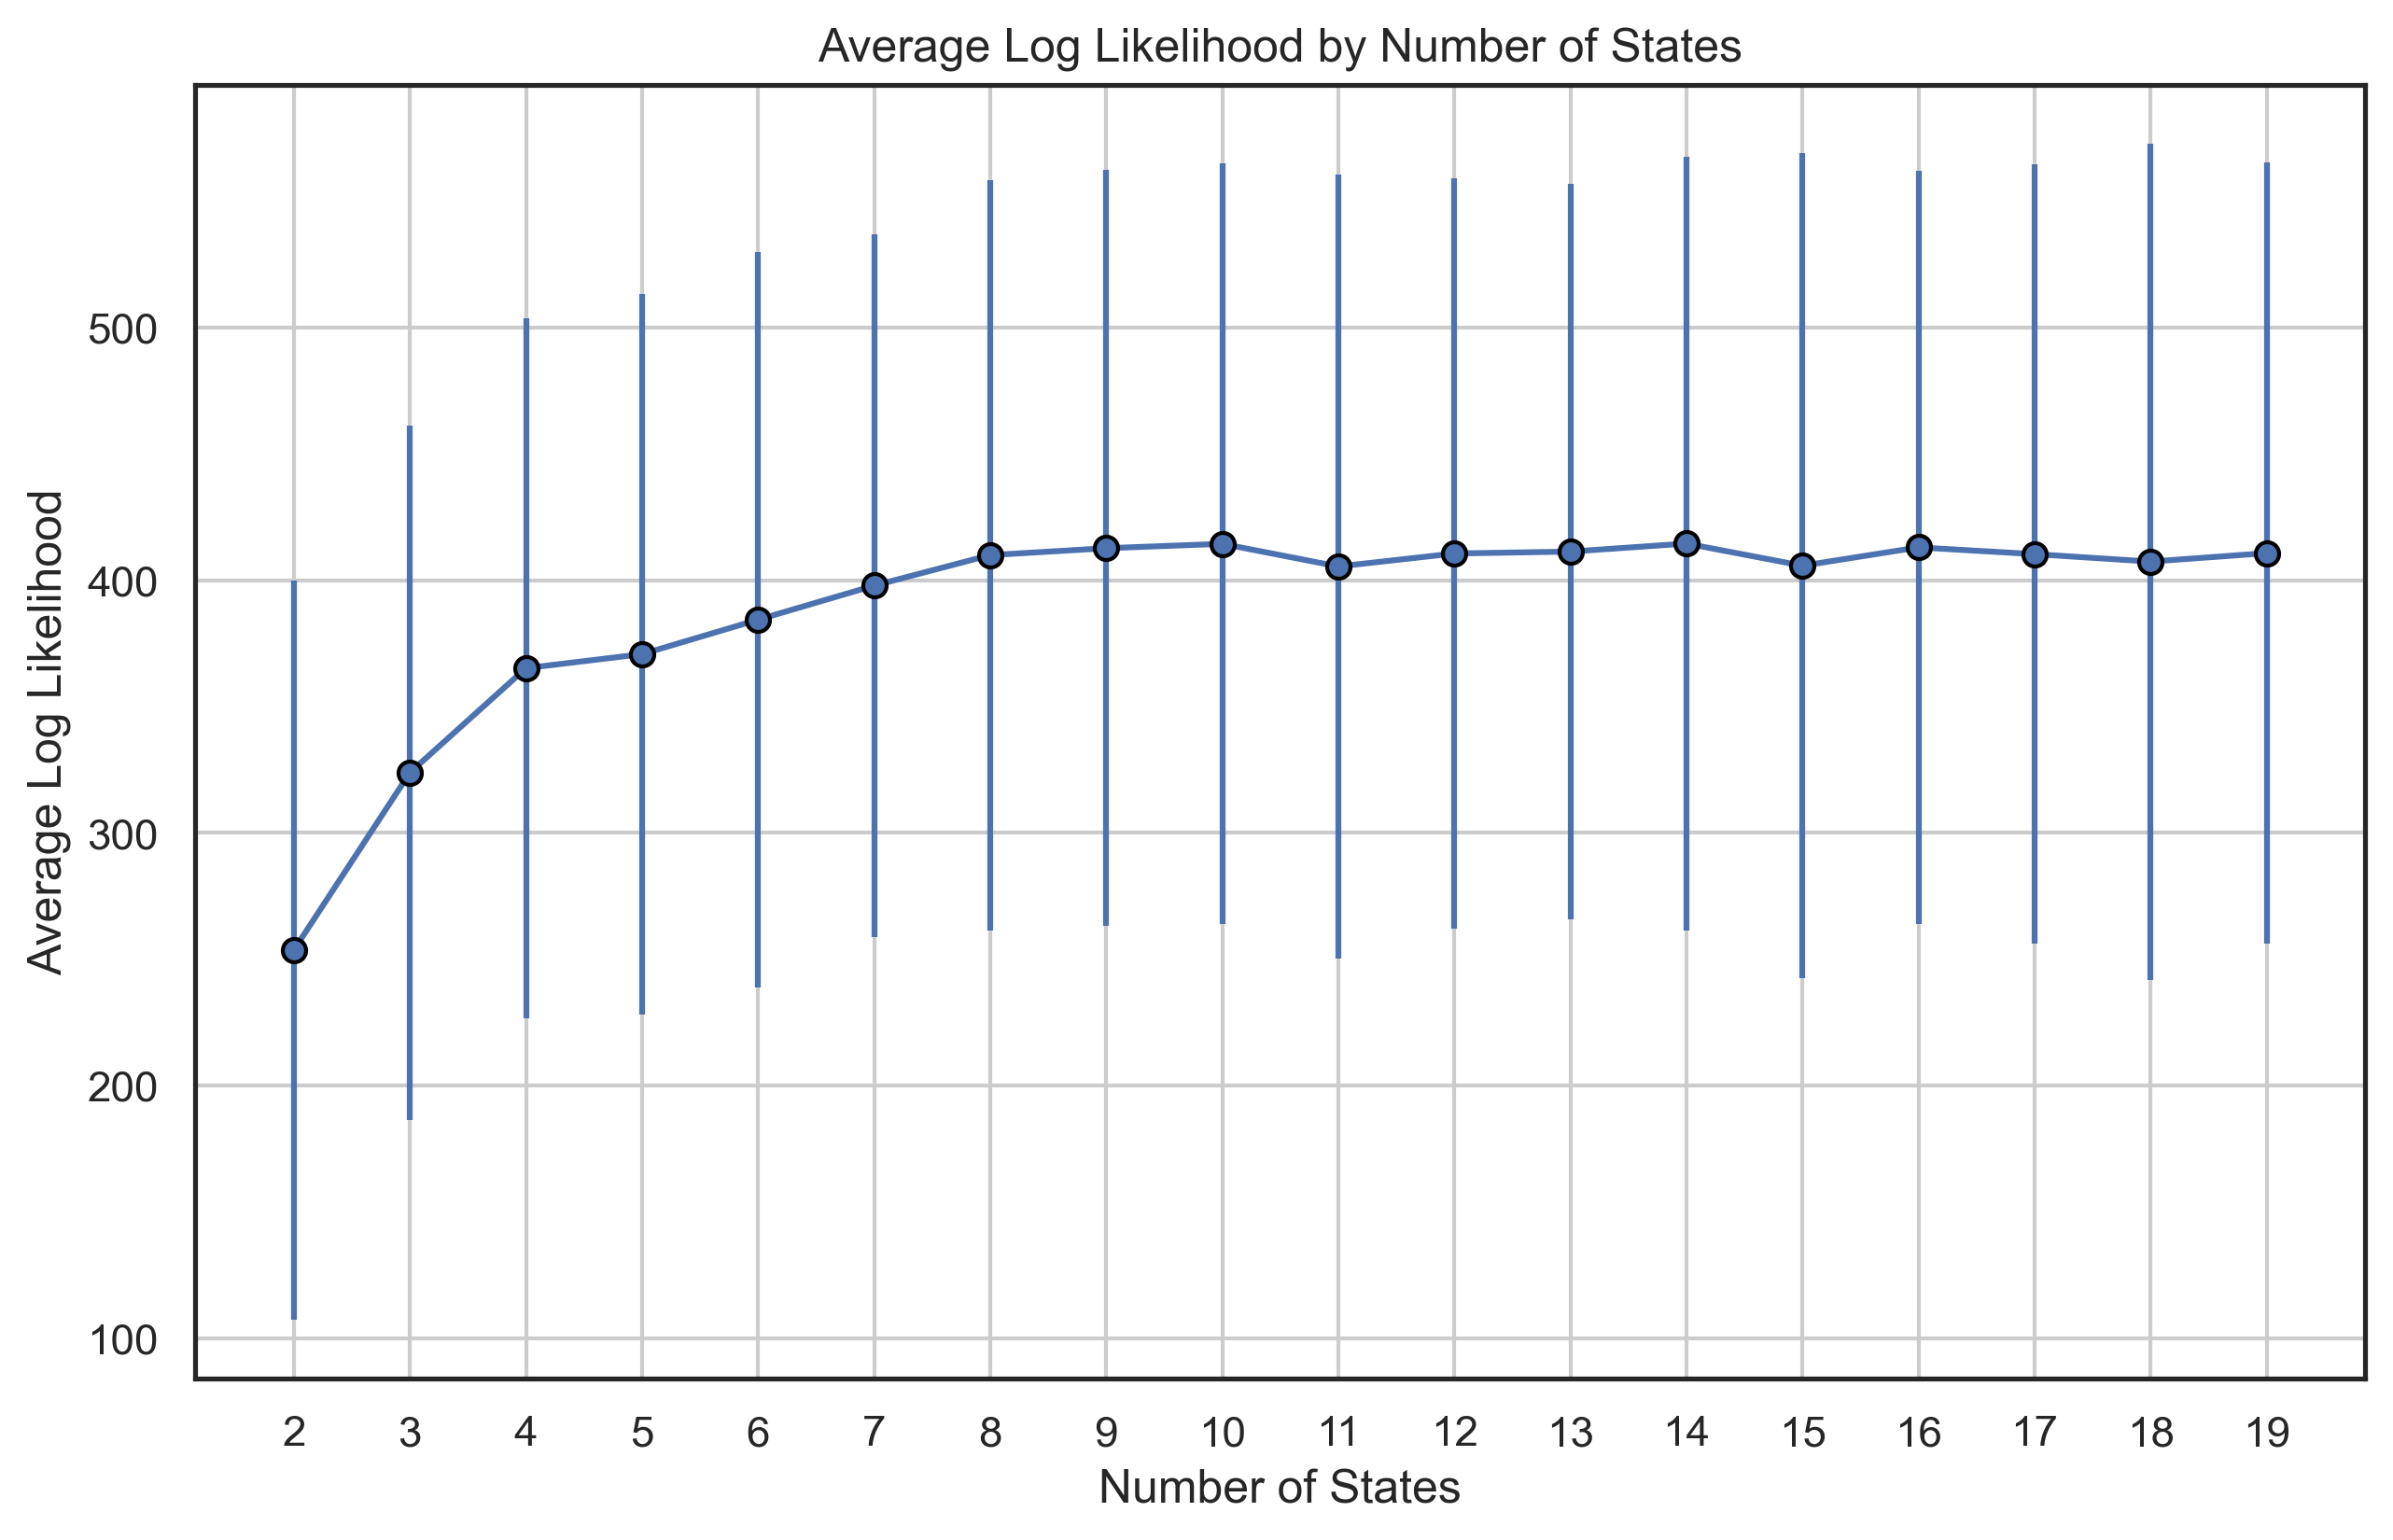

In [189]:
from dynamax.hidden_markov_model import LinearAutoregressiveHMM
import jax.numpy as jnp
import jax.random as jr
from sklearn.model_selection import KFold

# animal to use
emissions = X_shock[X_shock["Mouse_ID"] == "shock_FC_2"][["G", "R"]].to_numpy()

kfold_cross_val = KFold(n_splits=5, shuffle=False)

key = jr.PRNGKey(0)

def cross_validate(X, kfold, state_range):
    """Perform cross validation on a model using the given data and splits."""
    lls_group = []
    for state in state_range:
        lls = []
        for train_index, test_idx in kfold.split(X):  # Generate splits in each iteration
            X_train, X_test = X[train_index], X[test_idx]
            model = LinearAutoregressiveHMM(state, emission_dim=2, num_lags=1)
            inputs = model.compute_inputs(emissions=X_train)
            params, props = model.initialize(key=key, method="kmeans", emissions=X_train)
            # Fit with EM
            fitted_params, lps = model.fit_em(params, props, X_train, inputs)
            inputs_test = model.compute_inputs(emissions=X_test)
            # Compute log likelihood on test set
            lls.append(model.marginal_log_prob(fitted_params, X_test, inputs_test))
        lls_group.append(lls)
    return lls_group

lls = cross_validate(emissions, kfold_cross_val, range(2, 20))
lls_conglomn = np.array(lls)

# Compute mean and standard deviation, ignoring nan values
means = np.nanmean(lls_conglomn, axis=1)
stds = np.nanstd(lls_conglomn, axis=1)

# Number of states (assuming your state range starts from 2)
states = np.arange(2, 2 + len(means))

# Plotting
plt.figure(figsize=(10, 6))
plt.errorbar(states, means, yerr=stds, fmt='-o')

plt.title('Average Log Likelihood by Number of States')
plt.xlabel('Number of States')
plt.ylabel('Average Log Likelihood')
plt.xticks(states)
plt.grid(True)



In [190]:
# now fit the model with the best number of states
arhmm = LinearAutoregressiveHMM(8, emission_dim=2, num_lags=3)
inputs = arhmm.compute_inputs(emissions=emissions)
params, props = arhmm.initialize(key=key, method="kmeans", emissions=emissions)
# Fit with EM
fitted_params, lps = arhmm.fit_em(params, props, emissions, inputs)
# Get States
states = arhmm.most_likely_states(fitted_params, emissions, inputs)
posterior = arhmm.smoother(fitted_params, emissions, inputs=inputs)
most_likely_states = arhmm.most_likely_states(fitted_params, emissions, inputs=inputs)

c:\Users\ryansenne\anaconda3\envs\RamiPho\lib\site-packages\sklearn\cluster\_kmeans.py:1332: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=14.
  warnings.warn(


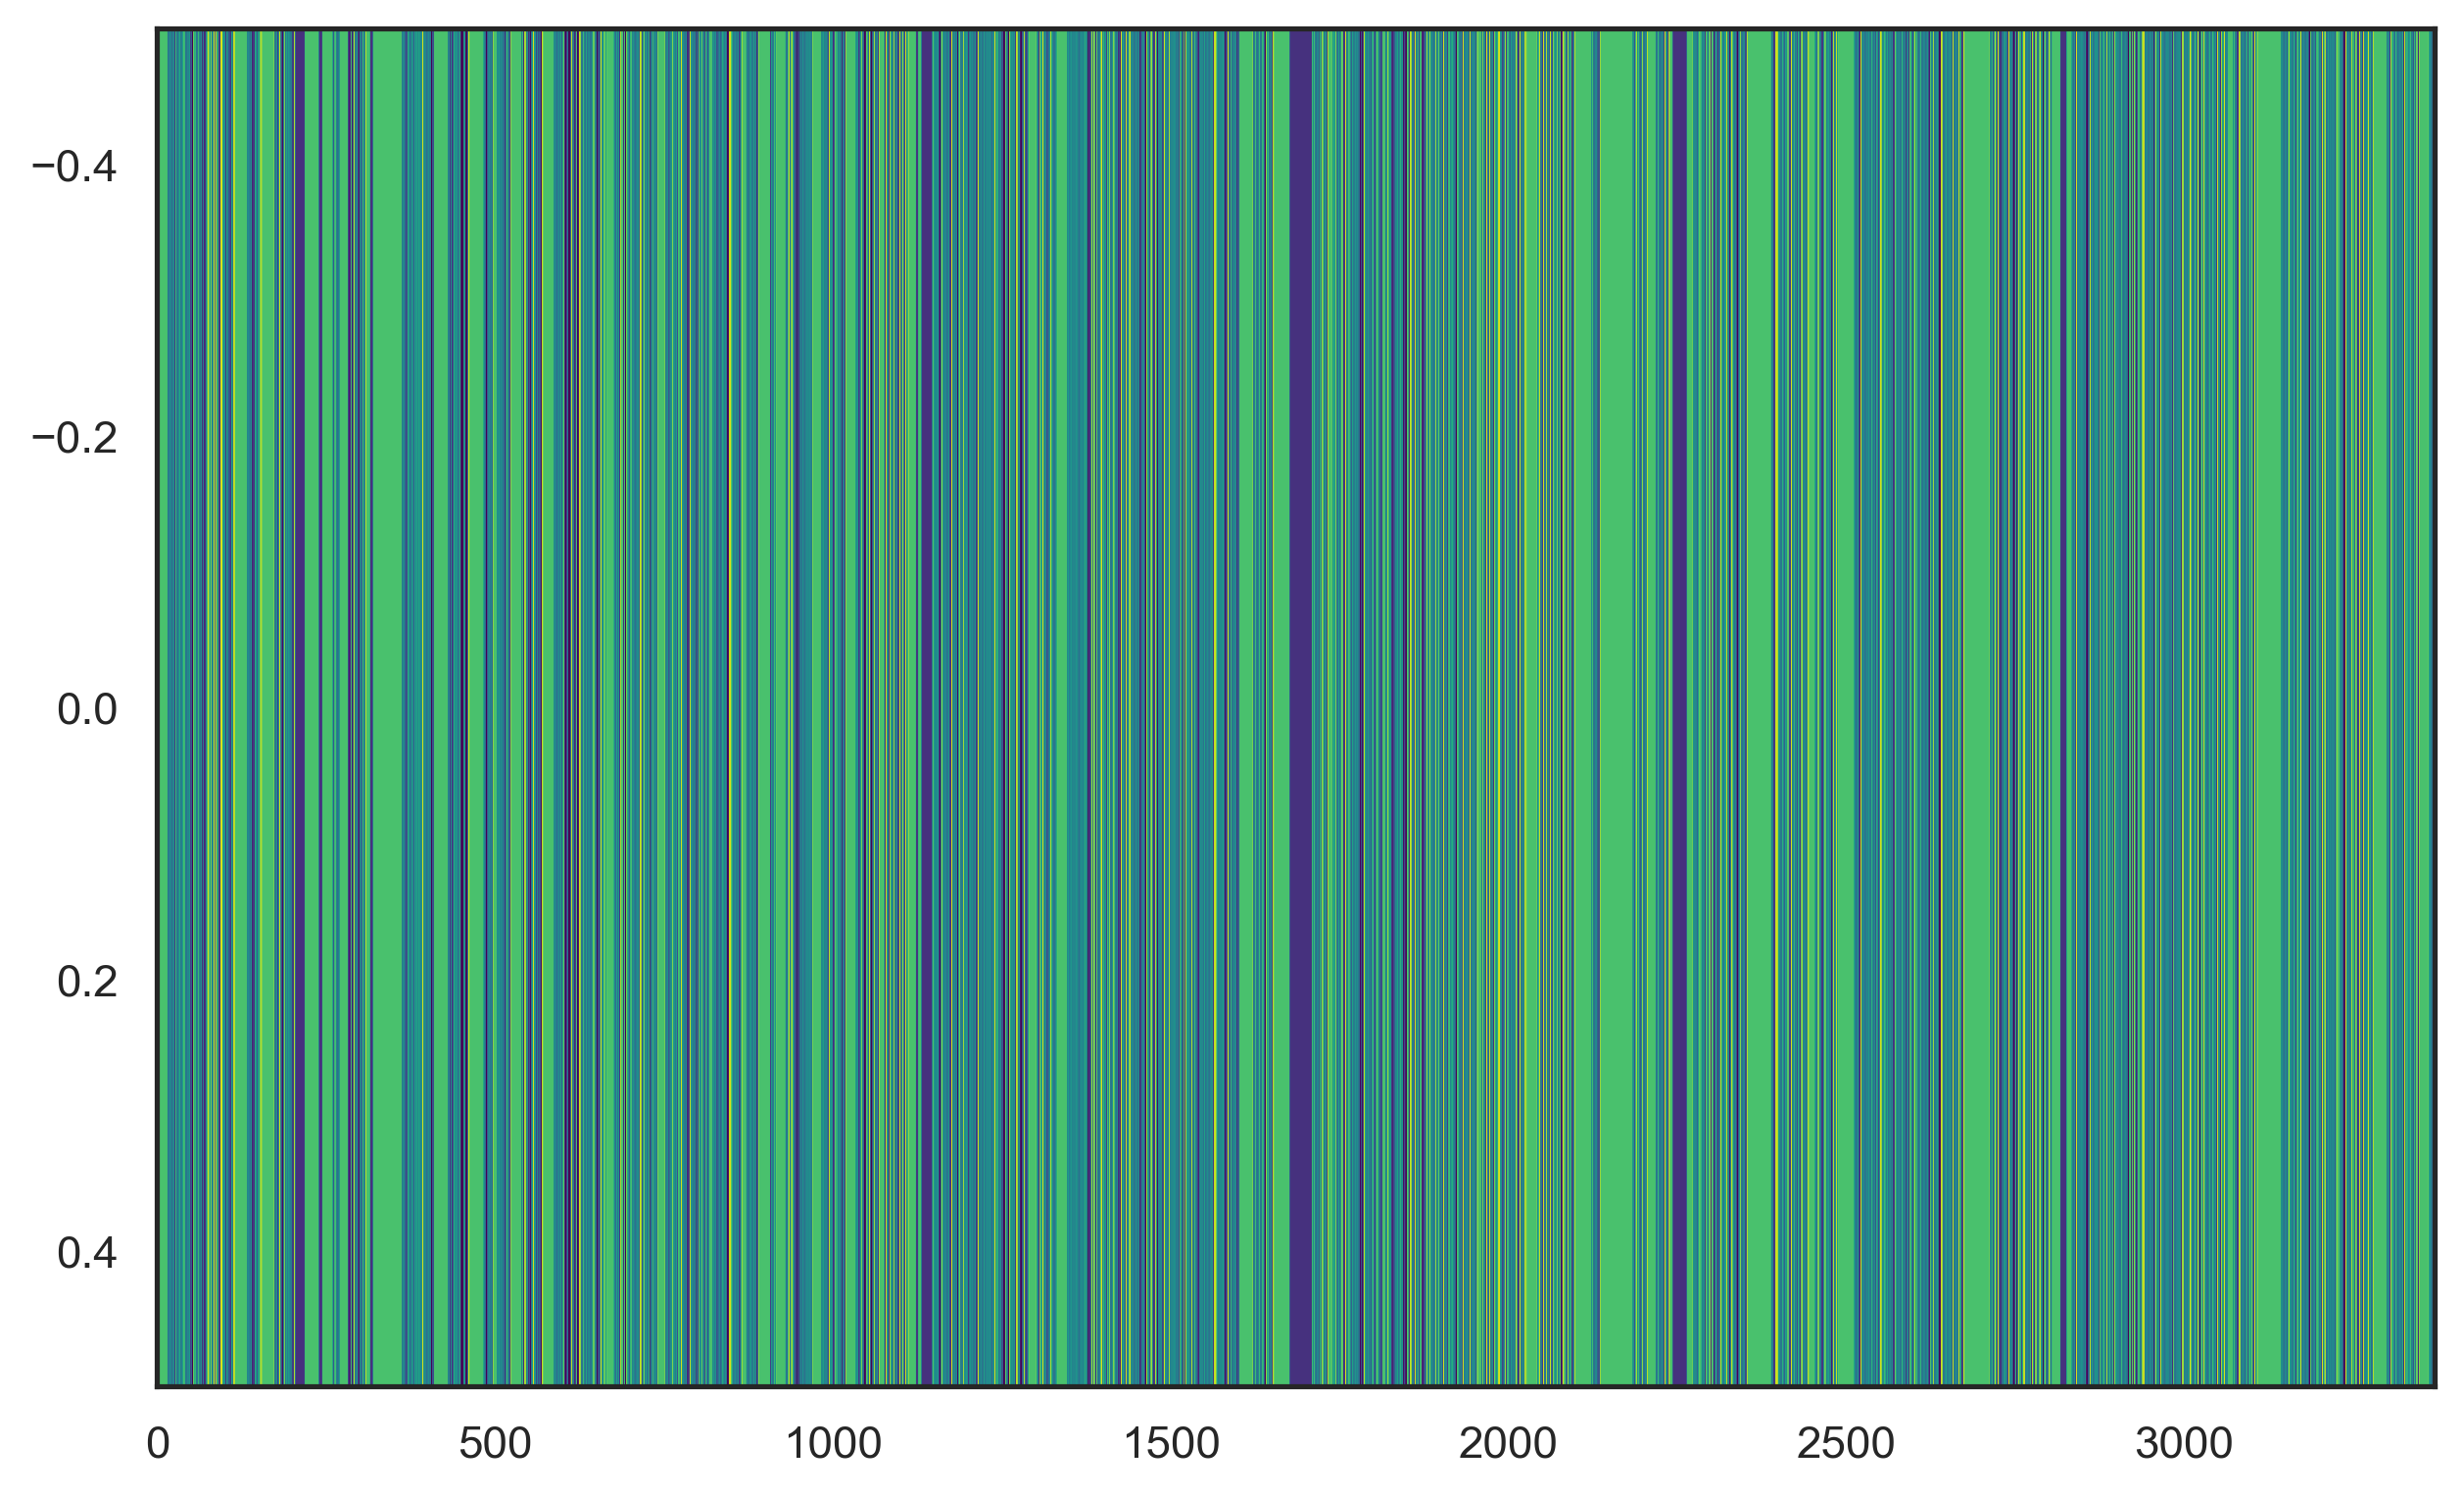

In [191]:
# plot the most likely states
fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(most_likely_states.reshape(-1, 1).T, aspect="auto", cmap="viridis")

Text(0.5, 0, 'time')

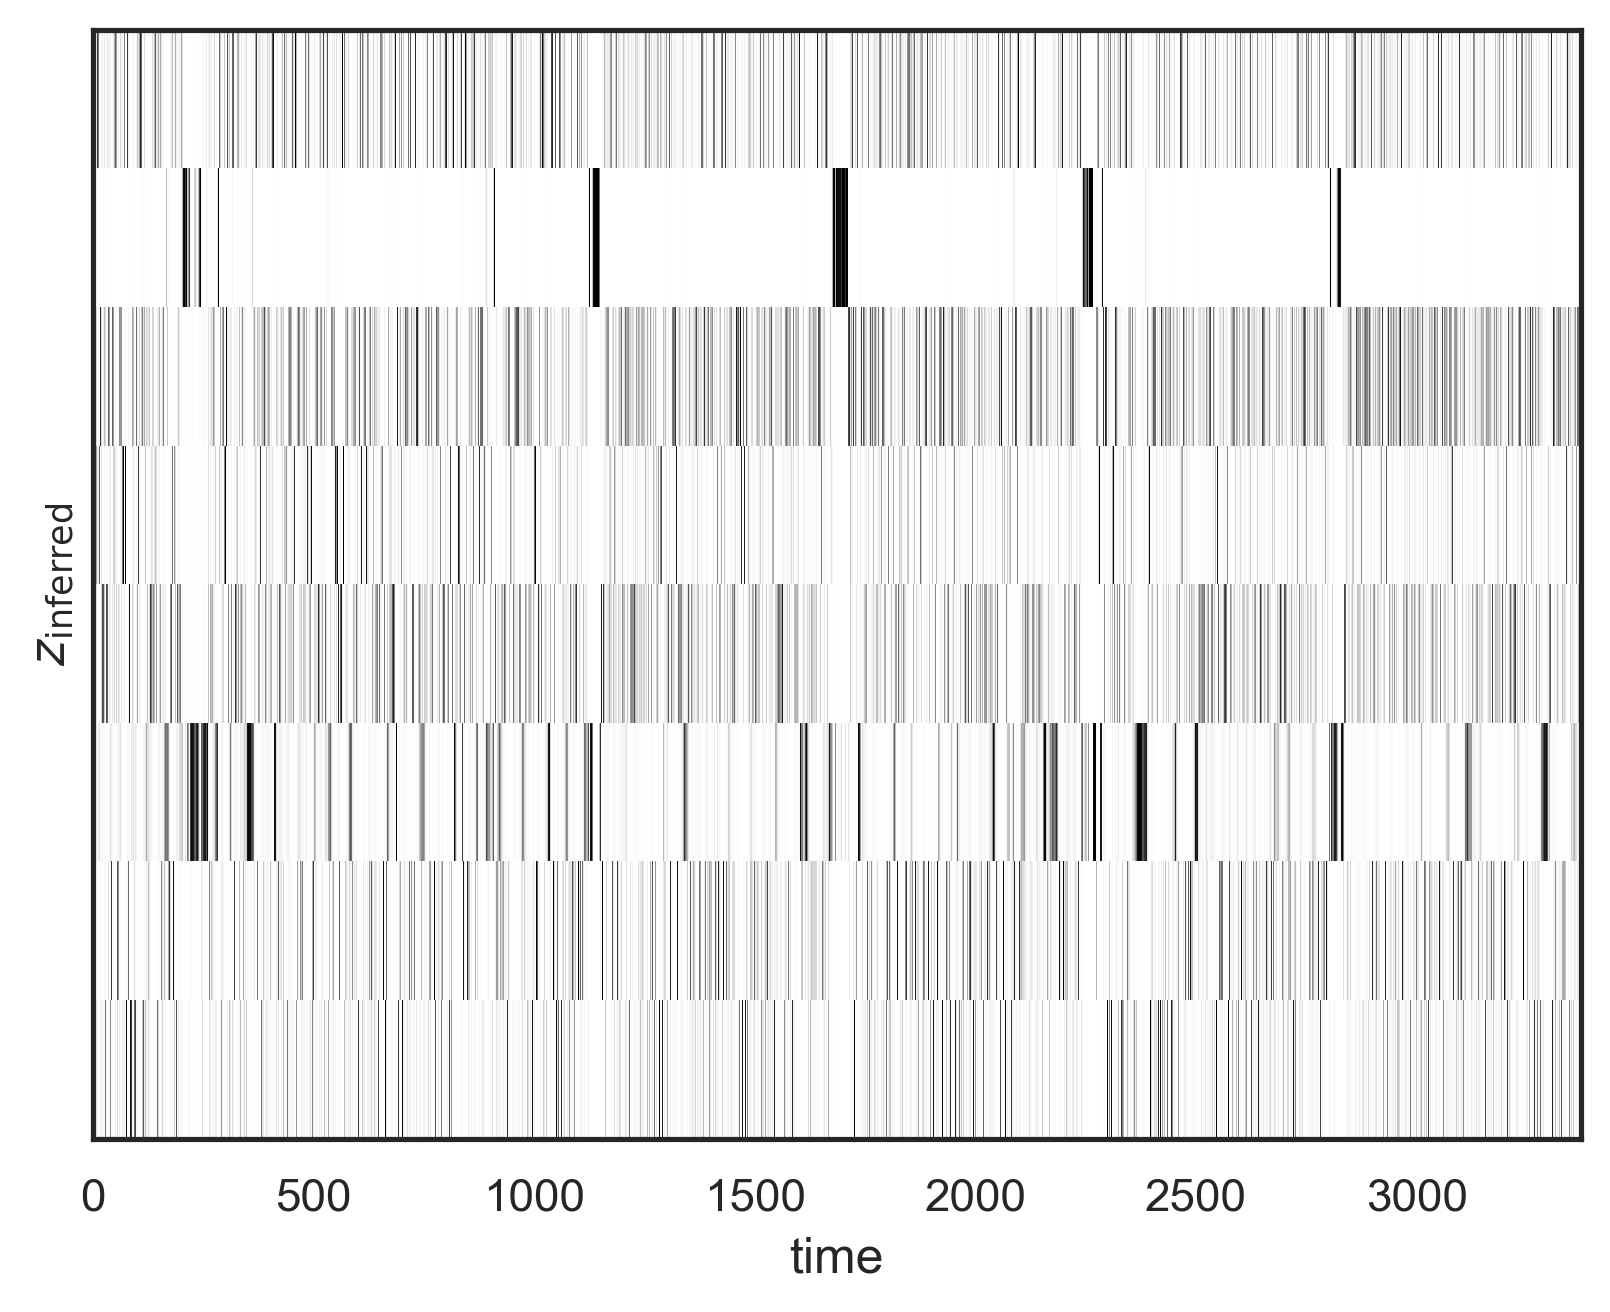

In [192]:

plt.imshow(posterior.smoothed_probs.T, aspect="auto", interpolation="none", cmap="Greys", vmin=0, vmax=1)
plt.ylabel("$z_{\\mathrm{inferred}}$")
plt.yticks([])
plt.xlabel("time")

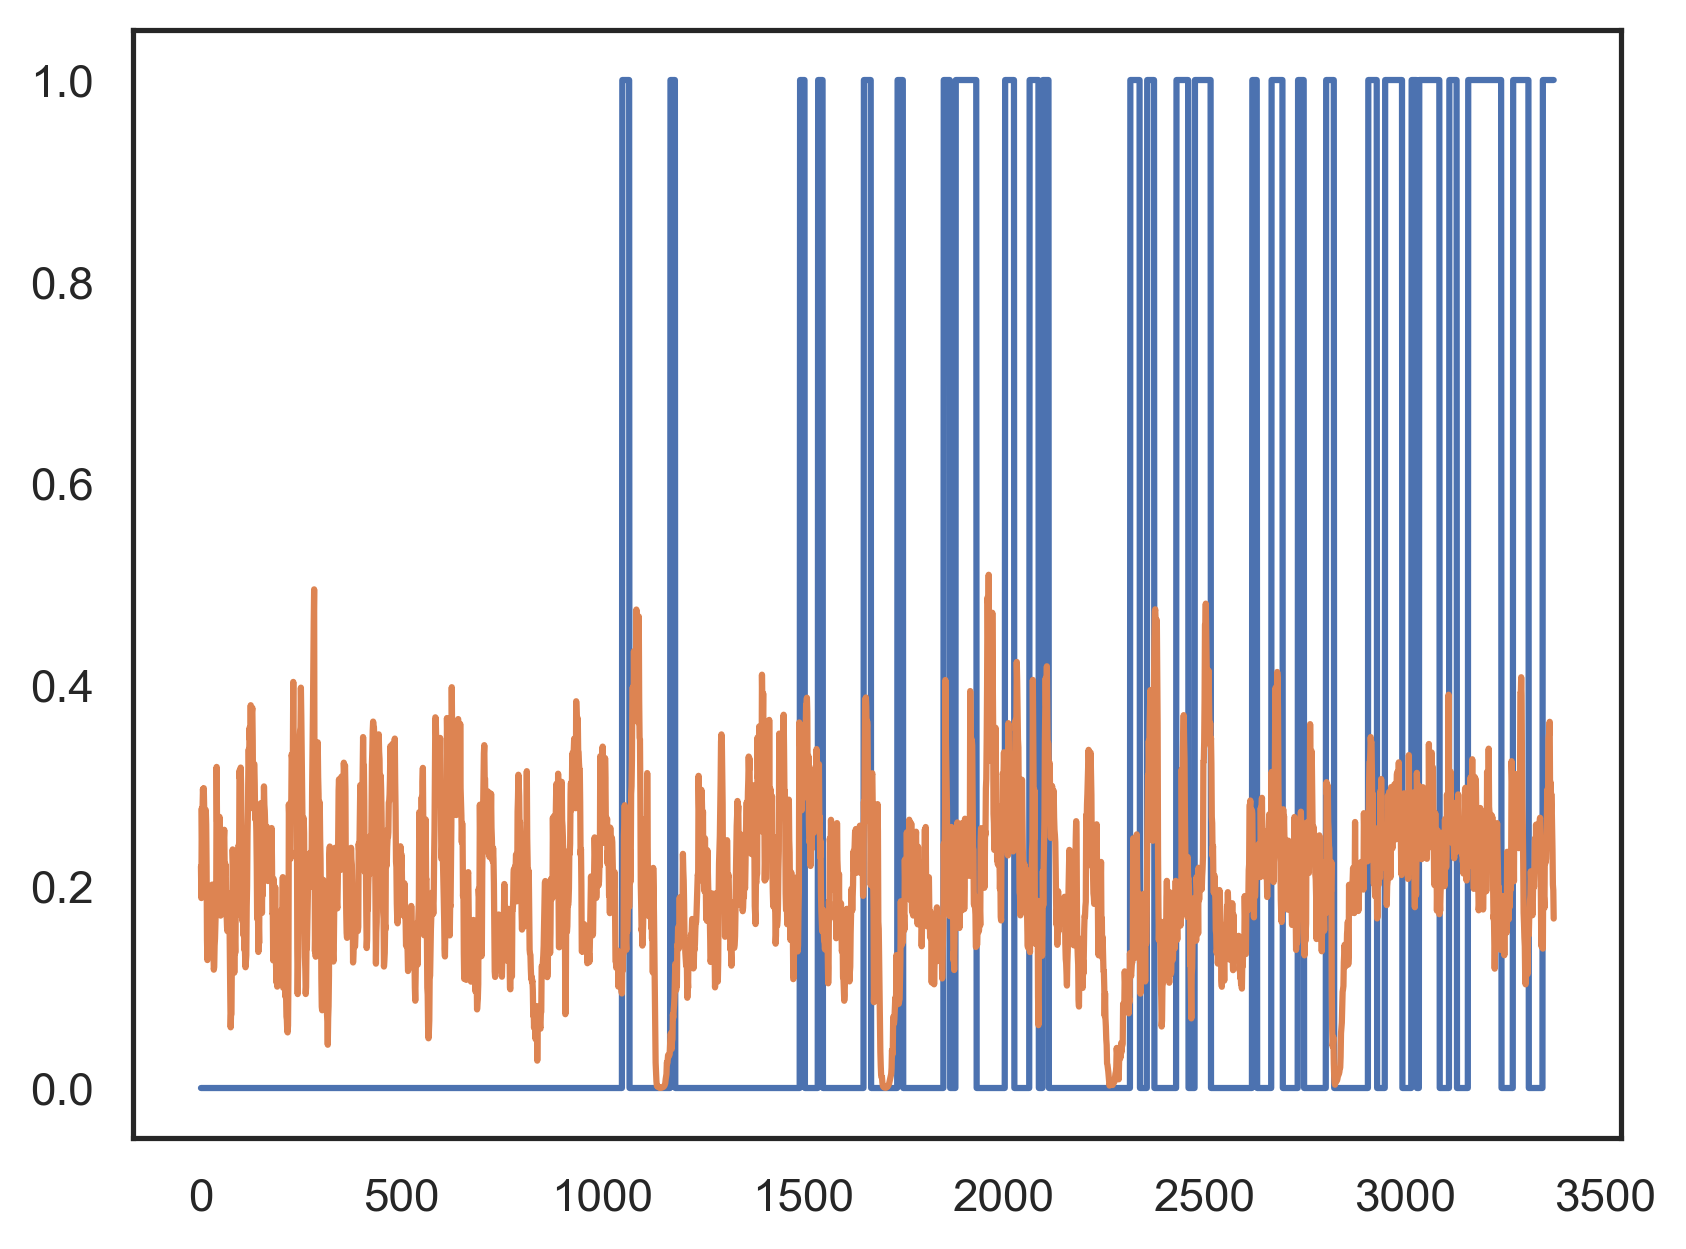

In [193]:
# fit a binomial regression against the states and freezing

# get response variable
y = shock_FC_2.behavioral_data["freeze_vector"]

# create dummy variables for states
state_dummies = pd.get_dummies(states, prefix="state", drop_first=True)
# concatenate signals
depend = pd.concat([state_dummies, pd.DataFrame(emissions)], axis=1)
model = sm.GLM(y, sm.add_constant(depend), family=sm.families.Binomial()).fit()


plt.plot(y)
plt.plot(model.mu, label="Predicted")

In [194]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 3372
Model:                            GLM   Df Residuals:                     3362
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1642.9
Date:                Wed, 22 Nov 2023   Deviance:                       3285.8
Time:                        22:03:04   Pearson chi2:                 3.37e+03
No. Iterations:                     6   Pseudo R-squ. (CS):            0.04596
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.5188      0.142    -10.677      0.000      -1.798      -1.240
state_1       -0.6587      0.387     -1.704      0.088      -1.417       0.099
state_2        0.0124      0.171      0.072      0.942      -0.323       0.348
state_3       -0.1990      0.233     -0.854      0.393      -0.656       0.258
state_4       -0.0076      0.178     -0.043      0.966      -0.356       0.341
state_5        0.0989      0.168      0.587      0.557      -0.231       0.429
state_6        0.0953      0.195      0.488      0.625      -0.287       0.478
state_7        0.3075      0.203      1.512      0.130      -0.091       0.706
0             -0.7083      0.105     -6.735      0.000      -0.914      -0.502
1             -0.2840      0.057     -5.022      0.000      -0.395      -0.173
==============================================================================
"""

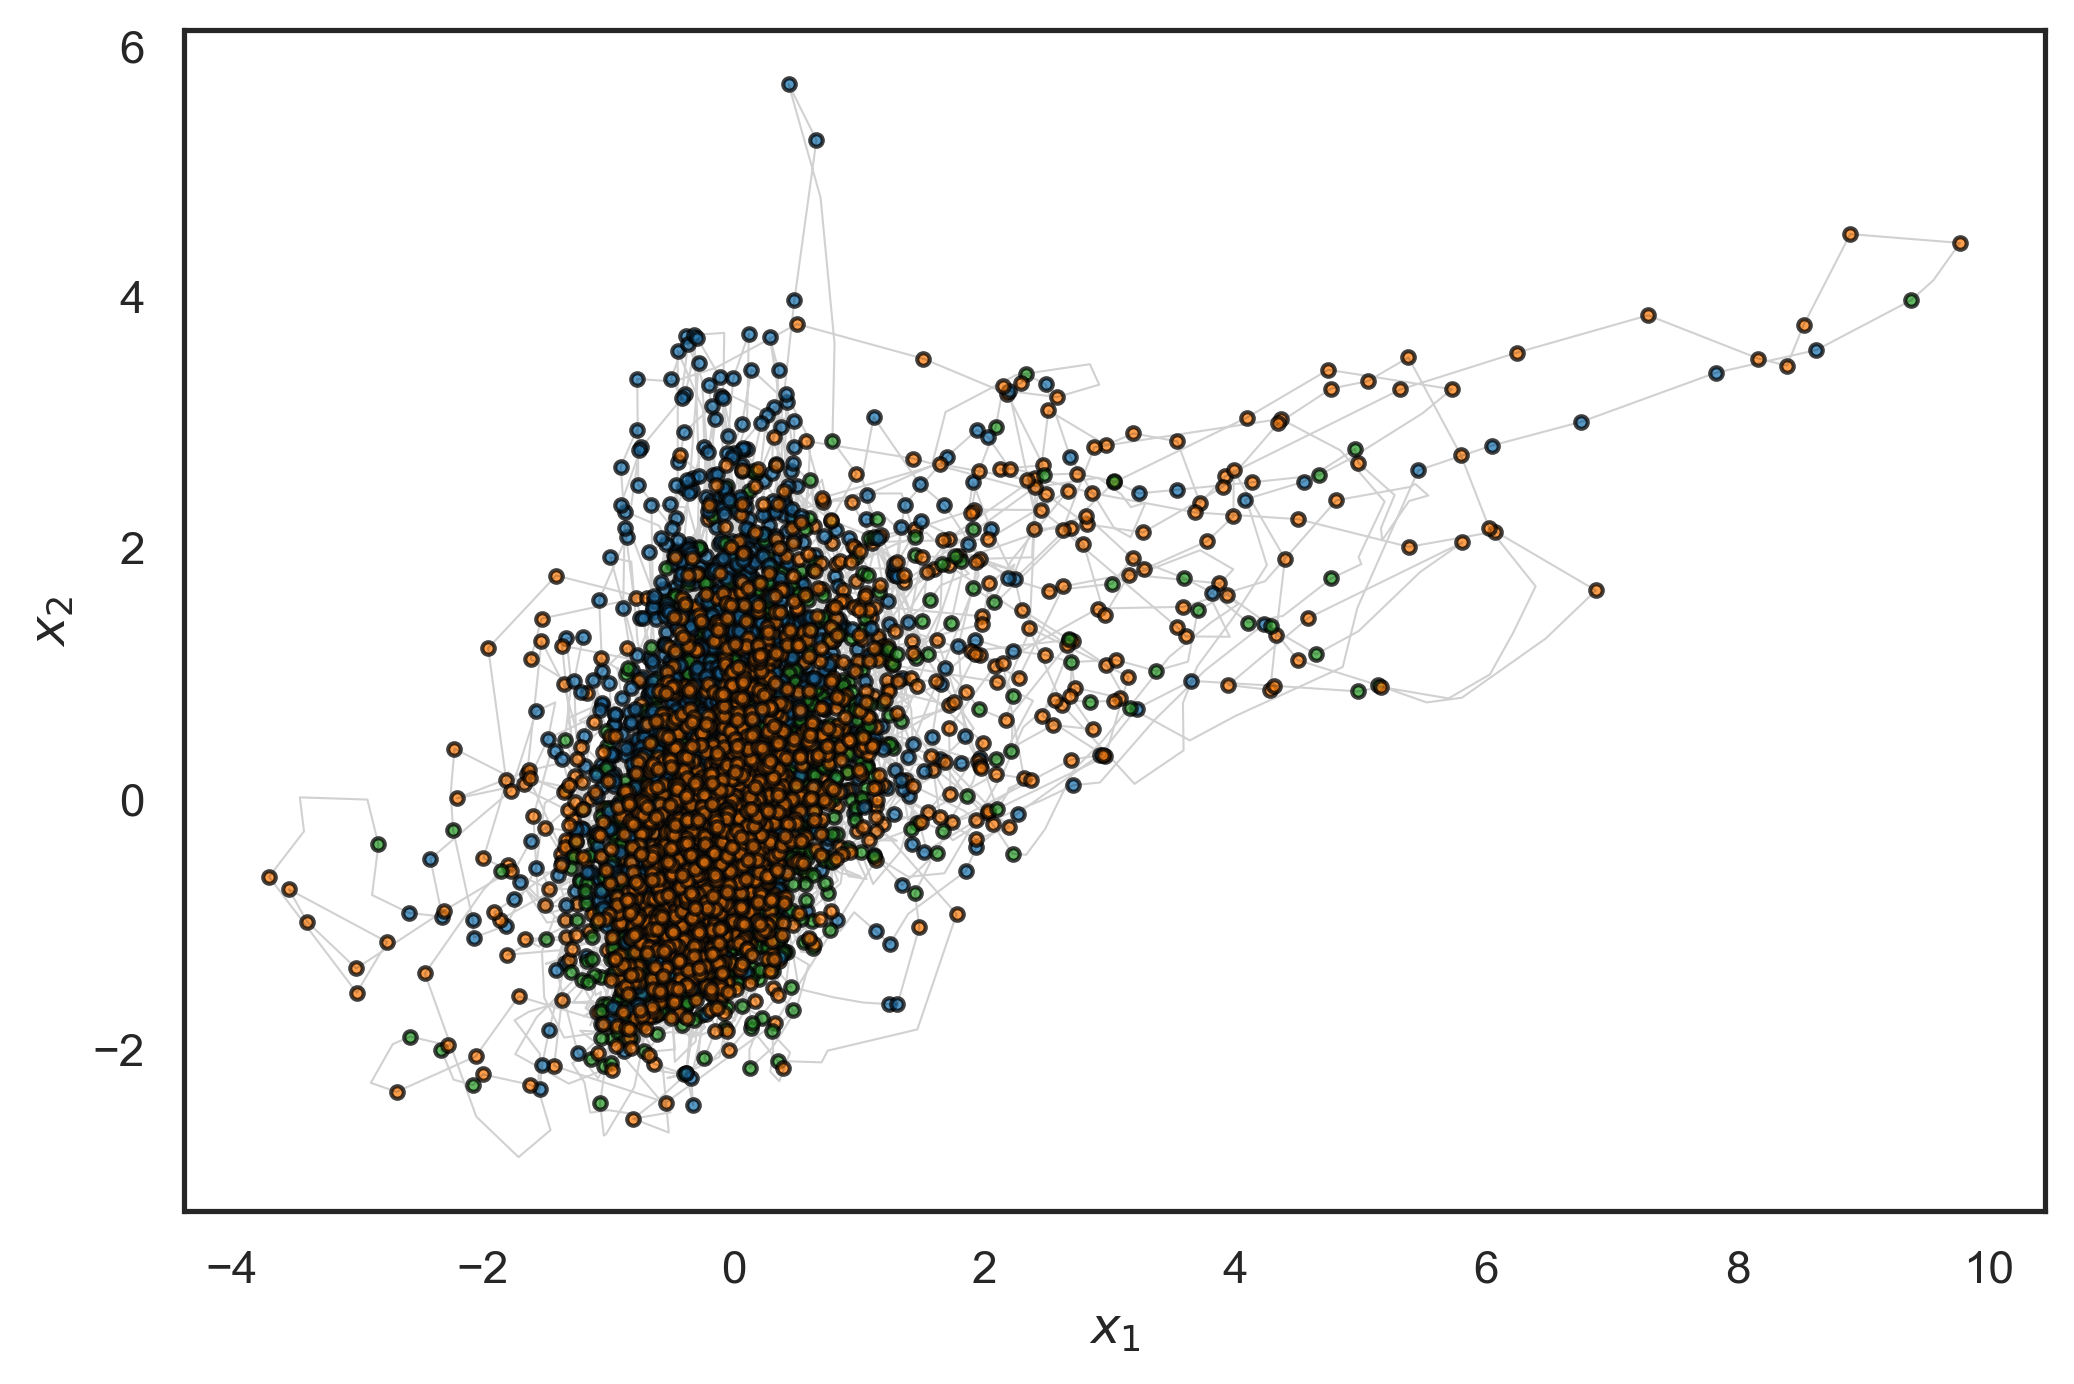

In [195]:
colors = sns.color_palette("tab10", n_colors=3)

sampled_states, sampled_emissions = arhmm.sample(fitted_params, jr.PRNGKey(0), 10000)
fig = plt.figure(figsize=(8, 8))
for k in range(5):
    plt.plot(*sampled_emissions[sampled_states==k].T, 'o', color=colors[k % len(colors)],
         alpha=0.75, markersize=3)
    
plt.plot(*sampled_emissions.T, '-k', lw=0.5, alpha=0.2)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.gca().set_aspect("equal")

In [135]:
means

array([439.21002, 475.364  , 479.1967 , 483.53583, 485.56866, 491.04883,
       478.0978 , 457.6371 ], dtype=float32)

In [108]:
emissions.shape

(3372, 2)

In [95]:
emissions

G         R
0    -0.696018 -1.470729
1    -0.548644 -1.156956
2    -0.266511 -0.964279
3     0.016438 -1.036735
4    -0.153417 -1.266907
...        ...       ...
3367 -0.384358 -0.716172
3368 -0.241003 -0.580219
3369 -0.050723 -0.405528
3370 -0.029058 -0.267289
3371  0.103405 -0.002335

[3372 rows x 2 columns]

TypeError: 'generator' object is not subscriptable